In [2]:
from fastai import *
from fastai.vision import*

ModuleNotFoundError: No module named 'fastai.vision'

In [2]:
path = untar_data(URLs.DOGS)
path

PosixPath('/home/jupyter/.fastai/data/dogscats')

In [3]:
torch.cuda.is_available()

True

In [4]:
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), size=224)
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['cats', 'dogs'], 2, 23000, 2000)

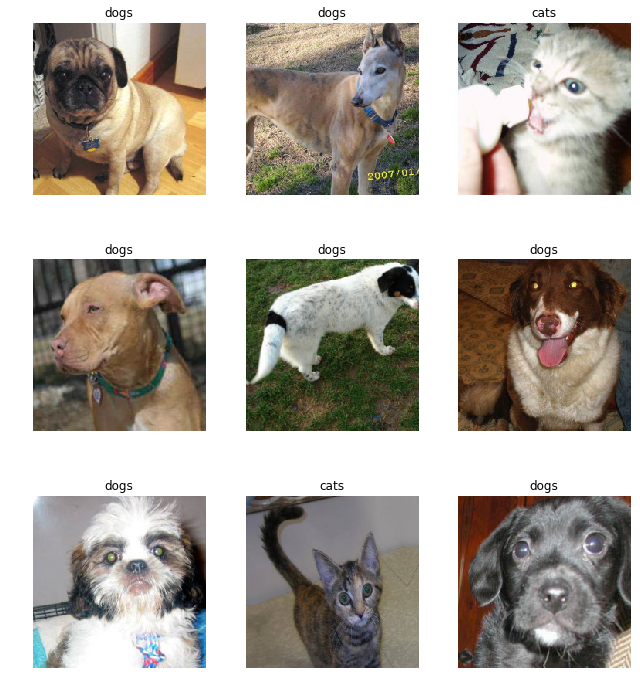

In [5]:
data.show_batch(3)

In [6]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [7]:
learn.fit_one_cycle(4)

Total time: 06:58
epoch  train_loss  valid_loss  error_rate
1      0.053248    0.029953    0.011500    (01:44)
2      0.044898    0.029094    0.011500    (01:43)
3      0.033184    0.024096    0.008000    (01:45)
4      0.028653    0.022868    0.007000    (01:45)



In [8]:
learn.save('cats-vs-dogs-resnet34-feature-extraction')

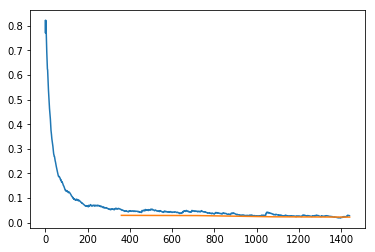

In [9]:
learn.recorder.plot_losses()

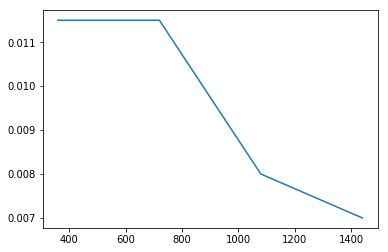

In [11]:
learn.recorder.plot_metrics()

In [12]:
interp = ClassificationInterpretation.from_learner(learn)

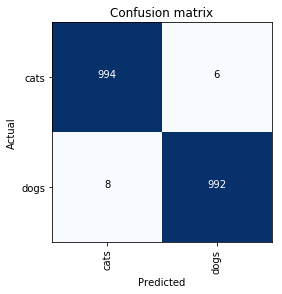

In [15]:
interp.plot_confusion_matrix()

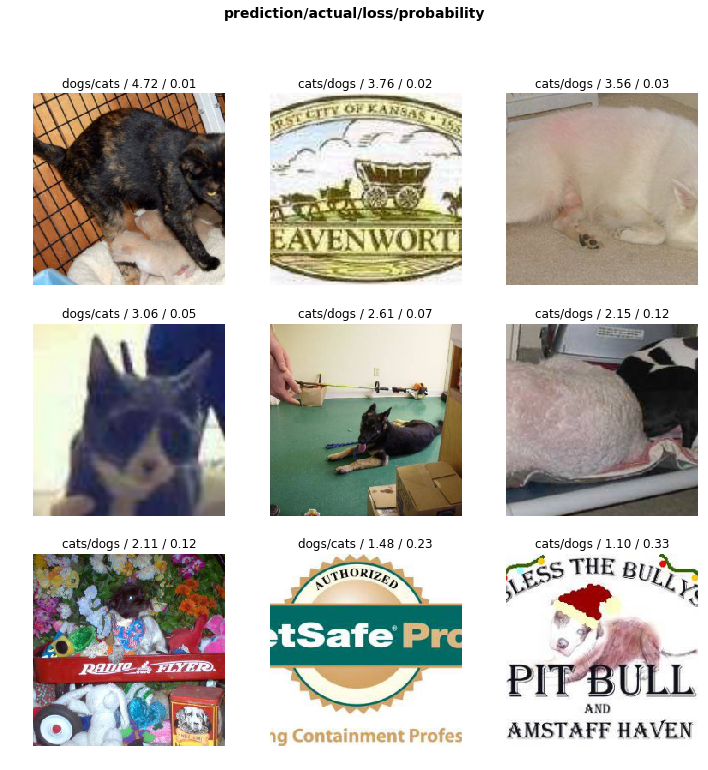

In [17]:
interp.plot_top_losses(9)

In [18]:
interp.most_confused(min_val=2)

[('dogs', 'cats', 8), ('cats', 'dogs', 6)]

In [19]:
# Fine tune
learn.unfreeze()
learn.lr_find(1)

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


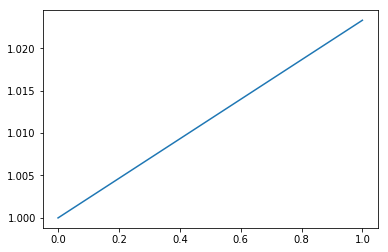

In [20]:
learn.recorder.plot_lr()

In [22]:
# Try resnet50
learn = create_cnn(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/jupyter/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:03<00:00, 31602920.58it/s]


In [23]:
learn.fit_one_cycle(4)

Total time: 14:08
epoch  train_loss  valid_loss  error_rate
1      0.048219    0.034672    0.010000    (03:35)
2      0.036118    0.030975    0.010000    (03:30)
3      0.030025    0.023590    0.008500    (03:30)
4      0.021093    0.023869    0.008000    (03:31)



In [24]:
learn.save('cats-vs-dogs-resnet50-feature-extraction')

In [32]:
ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), size=224, bs=16)
learn = create_cnn(data, models.resnet34, metrics=error_rate)
learn.load('cats-vs-dogs-resnet34-feature-extraction')
learn.fit_one_cycle(2)

Total time: 03:28
epoch  train_loss  valid_loss  error_rate
1      0.041284    0.027712    0.009000    (01:43)
2      0.027332    0.020398    0.007000    (01:45)



In [33]:
learn.fit_one_cycle(4)

Total time: 07:02
epoch  train_loss  valid_loss  error_rate
1      0.030574    0.025689    0.010000    (01:44)
2      0.029901    0.028130    0.009000    (01:45)
3      0.025816    0.018801    0.006000    (01:46)
4      0.020475    0.018727    0.007500    (01:45)

